In [1]:
import json
import numpy as np

from pylab import rcParams
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, balanced_accuracy_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

rcParams['figure.figsize'] = 8, 8

In [2]:
preds = np.loadtxt('../experiments/ECGNet/results/predictions.txt').astype(int)
mapping = json.load(open('../data/class-mapper.json'))
gt = [mapping[i['label']] for i in json.load(open('../data/val.json'))]

In [3]:
accuracy_score(gt, preds)

0.9817272552413926

In [4]:
recall_score(gt, preds, average='micro')

0.9817272552413926

In [5]:
precision_score(gt, preds, average='micro')

0.9817272552413926

In [6]:
balanced_accuracy_score(gt, preds)

0.905587189081752

In [7]:
np.mean(recall_score(gt, preds, average=None))

0.905587189081752

In [8]:
recall_score(gt, preds, average='macro')

0.905587189081752

In [9]:
f1_score(gt, preds, average='macro')

0.9321874671562357

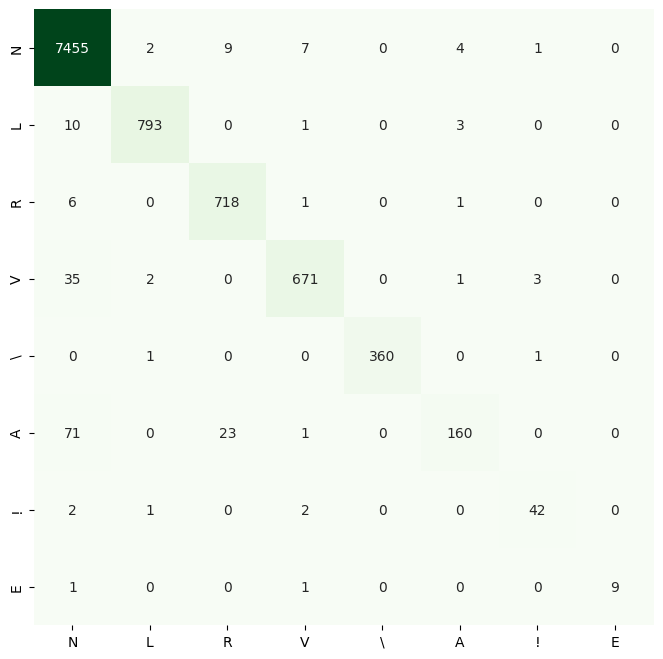

In [10]:
ax = sns.heatmap(confusion_matrix(gt, preds), annot=True, cmap="Greens", fmt='g', 
                 xticklabels=mapping.keys(), yticklabels=mapping.keys(), cbar=False, square=False)

In [11]:
plt.savefig("cm.png")

<Figure size 800x800 with 0 Axes>

In [12]:
cm = confusion_matrix(gt, preds)

In [13]:
cm

array([[7455,    2,    9,    7,    0,    4,    1,    0],
       [  10,  793,    0,    1,    0,    3,    0,    0],
       [   6,    0,  718,    1,    0,    1,    0,    0],
       [  35,    2,    0,  671,    0,    1,    3,    0],
       [   0,    1,    0,    0,  360,    0,    1,    0],
       [  71,    0,   23,    1,    0,  160,    0,    0],
       [   2,    1,    0,    2,    0,    0,   42,    0],
       [   1,    0,    0,    1,    0,    0,    0,    9]])

In [14]:
# Calculate precision and accuracy for each class  
num_classes = len(cm)  
precision = []  
accuracy = []
recall = []
  
for i in range(num_classes):  
    true_positives = cm[i, i]  
    false_positives = sum(cm[:, i]) - true_positives  
    false_negatives = sum(cm[i, :]) - true_positives  
    true_negatives = sum(sum(cm)) - true_positives - false_positives - false_negatives  
      
    class_precision = true_positives / (true_positives + false_positives)  
    class_accuracy = (true_positives + true_negatives) / sum(sum(cm)) 
    class_recall = true_positives / (true_positives + false_negatives) 
      
    precision.append(class_precision)  
    accuracy.append(class_accuracy)
    recall.append(class_recall)
  
# Print precision and accuracy for each class  
for i in range(num_classes):  
    print(f"Class {i}: Precision = {precision[i]:.2f}, \
          Accuracy = {accuracy[i]:.2f}, \
          Recall = {recall[i]:.2f}")  


Class 0: Precision = 0.98,           Accuracy = 0.99,           Recall = 1.00
Class 1: Precision = 0.99,           Accuracy = 1.00,           Recall = 0.98
Class 2: Precision = 0.96,           Accuracy = 1.00,           Recall = 0.99
Class 3: Precision = 0.98,           Accuracy = 0.99,           Recall = 0.94
Class 4: Precision = 1.00,           Accuracy = 1.00,           Recall = 0.99
Class 5: Precision = 0.95,           Accuracy = 0.99,           Recall = 0.63
Class 6: Precision = 0.89,           Accuracy = 1.00,           Recall = 0.89
Class 7: Precision = 1.00,           Accuracy = 1.00,           Recall = 0.82


In [15]:
for value, label in zip(recall_score(gt, preds, average=None), mapping.keys()):
    print ("{} - {:4f}".format(label, value), end=', ')

N - 0.996924, L - 0.982652, R - 0.988981, V - 0.942416, \ - 0.994475, A - 0.627451, ! - 0.893617, E - 0.818182, 

In [16]:
for value, label in zip(recall_score(gt, preds, average=None), mapping.keys()):
    print ("{} - {:4f}".format(label, value), end=', ')

N - 0.996924, L - 0.982652, R - 0.988981, V - 0.942416, \ - 0.994475, A - 0.627451, ! - 0.893617, E - 0.818182, 

In [17]:
from sklearn.metrics import classification_report

In [18]:
print(classification_report(
    gt, preds, target_names=mapping.keys()
))

              precision    recall  f1-score   support

           N       0.98      1.00      0.99      7478
           L       0.99      0.98      0.99       807
           R       0.96      0.99      0.97       726
           V       0.98      0.94      0.96       712
           \       1.00      0.99      1.00       362
           A       0.95      0.63      0.75       255
           !       0.89      0.89      0.89        47
           E       1.00      0.82      0.90        11

    accuracy                           0.98     10398
   macro avg       0.97      0.91      0.93     10398
weighted avg       0.98      0.98      0.98     10398

